# Import libiraries

In [79]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import plotly.express as px
import streamlit as st

# Read the excel file

In [2]:
df=pd.read_excel(r'D:\branches\the branch.xlsx')

In [3]:
df.head()

,Date,item_name,unit,cost per unit,current_balance,Consumption,beganing,purchasing,ending,COGS,order receiving
0,45383,Crunchy Granola,KG,105,127,5,132,NaN,127,525,25
1,45385,Crunchy Granola,KG,105,117,10,127,NaN,117,1050,35
2,45388,Crunchy Granola,KG,105,107,10,117,NaN,107,1050,55
3,45389,Crunchy Granola,KG,105,99,8,107,NaN,99,840,57
4,45390,Crunchy Granola,KG,105,94,5,99,NaN,94,525,65


In [4]:
# View the count of row and columns in the dataset
df.shape

(23, 11)

In [5]:
# View summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             23 non-null     int64  
 1   item_name        23 non-null     object 
 2   unit             23 non-null     object 
 3   cost per unit    23 non-null     int64  
 4   current_balance  23 non-null     int64  
 5   Consumption      23 non-null     int64  
 6   beganing         23 non-null     int64  
 7   purchasing       1 non-null      float64
 8   ending           23 non-null     int64  
 9   COGS             23 non-null     int64  
 10  order receiving  23 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 2.1+ KB


In [6]:
# drop the redudant variables  
df.drop(columns=['purchasing','Date'],axis=1,inplace=True)


In [7]:
# check the shape after dropping 
df.shape

(23, 9)

In [8]:
# View the summary of statistacs of the numerical variables
print(round(df.describe()))


       cost per unit  current_balance  Consumption  beganing  ending    COGS  \
count           23.0             23.0         23.0      23.0    23.0    23.0   
mean           105.0             89.0         12.0      95.0    89.0  1223.0   
std              0.0             39.0          8.0      38.0    39.0   855.0   
min            105.0              0.0          0.0       0.0     0.0     0.0   
25%            105.0             66.0          5.0      72.0    66.0   525.0   
50%            105.0             94.0          9.0      99.0    94.0   945.0   
75%            105.0            118.0         15.0     122.0   118.0  1575.0   
max            105.0            150.0         30.0     150.0   150.0  3150.0   

       order receiving  
count             23.0  
mean              60.0  
std               36.0  
min                0.0  
25%               32.0  
50%               57.0  
75%               85.0  
max              150.0  


In [9]:
# the frequency distribution of values in variables
for var in df.columns:
    print (df[var].value_counts())

item_name
Crunchy Granola    23
Name: count, dtype: int64
unit
Pcs       13
KG         8
Bottle     1
Packet     1
Name: count, dtype: int64
cost per unit
105    23
Name: count, dtype: int64
current_balance
127    1
117    1
107    1
99     1
94     1
89     1
74     1
69     1
64     1
49     1
23     1
0      1
150    1
145    1
137    1
126    1
120    1
113    1
98     1
90     1
75     1
55     1
35     1
Name: count, dtype: int64
Consumption
5     7
15    3
10    2
8     2
26    1
23    1
0     1
9     1
7     1
12    1
20    1
25    1
30    1
Name: count, dtype: int64
beganing
132    1
127    1
117    1
107    1
99     1
94     1
89     1
74     1
69     1
64     1
49     1
23     1
0      1
150    1
145    1
135    1
125    1
120    1
110    1
105    1
95     1
80     1
65     1
Name: count, dtype: int64
ending
127    1
117    1
107    1
99     1
94     1
89     1
74     1
69     1
64     1
49     1
23     1
0      1
150    1
145    1
137    1
126    1
120    1
113    1
98     

In [10]:
# check the data types of columns 

In [11]:
df.dtypes

item_name          object
unit               object
cost per unit       int64
current_balance     int64
Consumption         int64
beganing            int64
ending              int64
COGS                int64
order receiving     int64
dtype: object

## the summary of variables :
* there are 7 numeric feature in the dataset .
* all numeric feature are continous type .
* out of all the 9 features , there are 3 featres that i need in the model and one target column called order recieving .

In [12]:
# check the missing values in the variables 
df.isnull().sum()

item_name          0
unit               0
cost per unit      0
current_balance    0
Consumption        0
beganing           0
ending             0
COGS               0
order receiving    0
dtype: int64

### Check the distribution of variables


* Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed. 

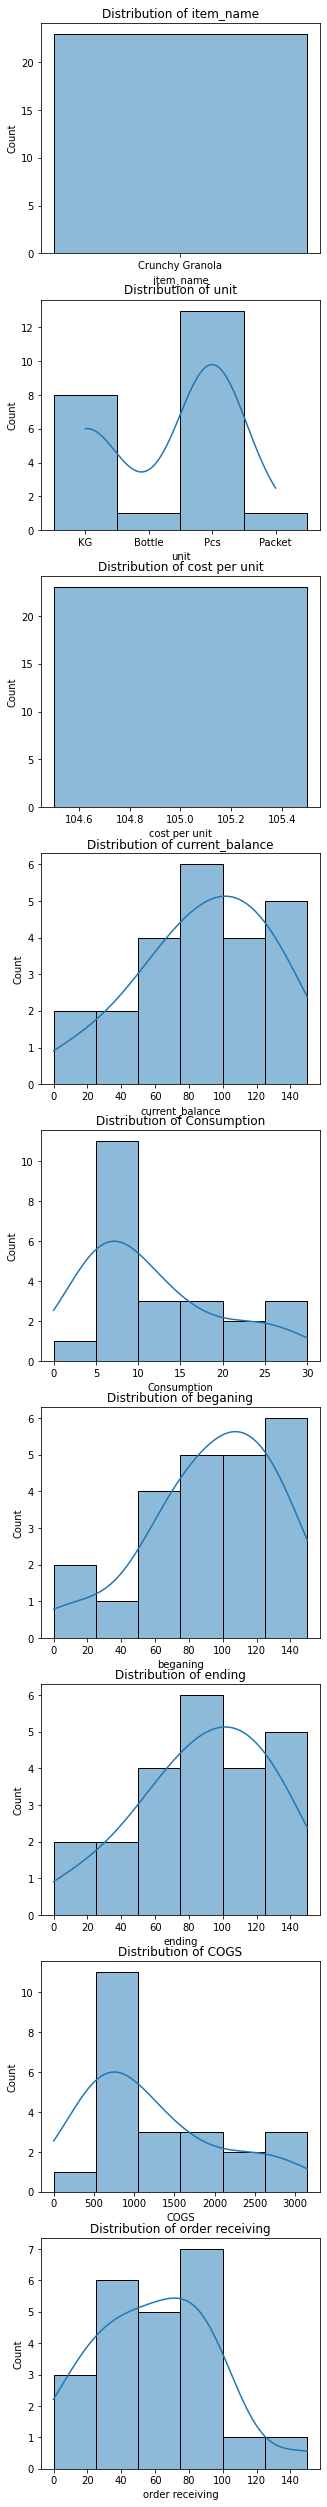

In [13]:
# plot histograms of the variables
n_cols = len(df.columns)
fig, axes = plt.subplots(n_cols, 1, figsize=(5, 5 * n_cols))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}");

In [14]:
df_numeric=df.select_dtypes(int)

In [15]:
# the correlations between the features and target
correlation = df_numeric.corr()

In [16]:
correlation['order receiving'].sort_values(ascending=True)

current_balance   -0.974261
ending            -0.974261
beganing          -0.572903
Consumption        0.656935
COGS               0.656935
order receiving    1.000000
cost per unit           NaN
Name: order receiving, dtype: float64

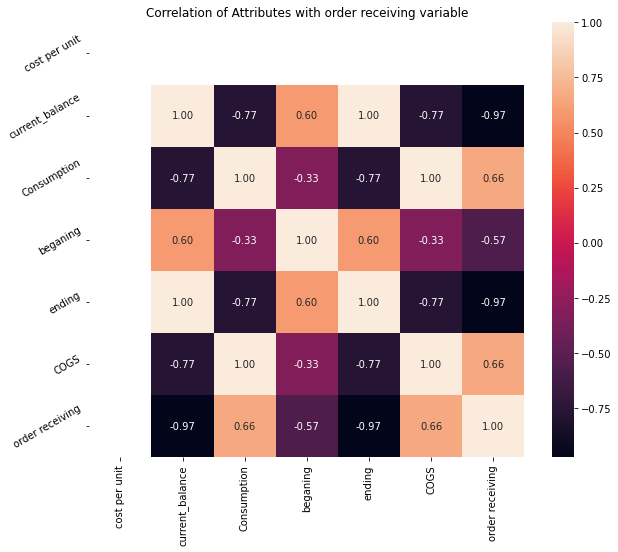

In [17]:
# visualize the feature and targest 
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with order receiving variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [20]:
# outlier detection 
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier range
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

# Display the outliers
outliers = outliers.sum()
print("Outliers per column:")
print(outliers)

Outliers per column:
cost per unit      0
current_balance    0
Consumption        0
beganing           0
ending             0
COGS               0
order receiving    0
dtype: int64


In [24]:
# Split the data to x and y
x=df_numeric.loc[:,'current_balance'].values
y=df_numeric.iloc[:,-1].values
x=x.reshape(-1,1)

In [50]:
x

array([[127],
       [117],
       [107],
       [ 99],
       [ 94],
       [ 89],
       [ 74],
       [ 69],
       [ 64],
       [ 49],
       [ 23],
       [  0],
       [150],
       [145],
       [137],
       [126],
       [120],
       [113],
       [ 98],
       [ 90],
       [ 75],
       [ 55],
       [ 35]])

In [51]:
y

array([ 25,  35,  55,  57,  65,  75,  80,  85,  90,  95, 100, 150,   0,
         5,  15,  25,  30,  40,  45,  55,  70,  85,  95])

In [52]:
# spiliting the data into tarining and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train

array([[150],
       [117],
       [145],
       [ 89],
       [107],
       [  0],
       [ 75],
       [ 99],
       [ 94],
       [ 98],
       [120],
       [ 55],
       [ 35],
       [ 69],
       [ 23],
       [137],
       [ 90],
       [ 74]])

In [54]:
x_test

array([[126],
       [ 49],
       [127],
       [ 64],
       [113]])

In [55]:
sc=StandardScaler()
x_train_Scaled=sc.fit_transform(x_train)
x_test_Scaled=sc.transform(x_test)

In [56]:
model=LinearRegression()
model.fit(x_train_Scaled,y_train)

LinearRegression()

In [64]:
y_pred=model.predict(x_test_Scaled) 
y_pred2=model.predict(x_train_Scaled)

In [65]:
y_pred

array([27.54635709, 95.09302724, 26.66912761, 81.934585  , 38.95034036])

In [61]:
y_test

array([25, 95, 25, 90, 40])

In [67]:
accuracy_of_testing=r2_score(y_test,y_pred)
accuracy_of_training=r2_score(y_train,y_pred2)

In [69]:
accuracy_of_testing

0.984447158767351

In [73]:
accuracy_of_training

0.9413522725774566